<a href="https://colab.research.google.com/github/KikiTikiKiwi/Assignment_0/blob/main/FinalProjectReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Abstract


##Abstract:
In recent decades, one of the most prominent topics of debates and discussions is using melee weapons, and firearms, in the United States of America. While using weapons in this country is legal, scientists are continuously trying to innovate and develop ways in which they can facilitate the paths for police to monitor and arrest the people who are trying to use these tools for criminal purposes.  

In this project, we strived to train a model to detect people who unveil their weapons in public, which is considered a potentially hazardous situation even if the person has not aimed the gun at anyone.

We aimed to use the most advanced techniques available to train the model, in order to get the optimal results. We used the Convolutional Neural Network (CNN) and YOLO (You Only Look Once) for our model. Although we were monitoring several different performance metrics, mAP_0.5, mAP_0.5:0.9, recall, precision, we focused on achieving high "recall" (low false negative), mainly because we needed to detect all tools, regardless of whether they were correctly identified as weapons. When we prioritized the “recall” as the most important performance metric, the model detected a few incorrect tools. Due to our sensitivity to our project, it was not an issue, as we needed to maintain a high accuracy as the recall increases.

While some companies have worked on the concept of weapon detection such as Bosch Security and Safety Systems, ZeroEyes, Evolve, ... our project's uniqueness laid in splitting the melee weapons and firearms into several subclasses, which provided some advantages to the results like context-specific threat assessment.

# Introduction

##Introduction:
In today’s era of scientific advancement, not only are most people willing to use cameras to monitor their car, house, and businesses, but also the authorities and governments are eager to leverage the applied AI and Neural Network models to cameras to detect and become aware of potential threats through live feeds from streets, highways and public areas like malls and stadiums as soon as the threat starts to emerge.

Deep learning architecture, as a sub-field of machine learning, relies on learning various features of the main data. The simple architecture of deep learning is Convolutional Neural Network, that includes convolutional layers, max pooling, activation function, dropout, fully connected layer, and classification layers.

In recent years, the CNNs have stayed at the pinnacle of performance in terms of object detection, classification, and image segmentation. CNNs are widely used for object detection, primarily because they excel at extracting features from images, allowing for accurate object detection. The combination of CNNs with algorithms like Yolo (You Only Look Once), which is a single-stage way, provides higher speed and efficiency for real-time object detection. It makes the ideal situation for projects like weapon detection, in which the speed and accuracy of detection are vital.

Our project presents a new model in the field of gun detection with detection of eight classes that are celurit, handgun, long-blade, machine gun, rifle, short-blade, shotgun, and submachine gun, based on deep learning, combination of CNN and YOLO.

# Dataset Description


## Dataset preparation:
 It is crucial to obtain a balanced set of data across all classes, which can impact the performance of a model significantly. 2 These images must align precisely with the detection goals outlined in the last section, or else it hinders the performance. By collecting images through Roboflow Universe, Image Scraping, and individually picking images from websites, we could compile a final dataset on its 14th iteration with at least 1,500 images per class spread across eight or more classes. Although re-annotating some of the images in downloaded ready-to-go datasets from Roboflow took much less time, manually annotating the downloaded images was unavoidable for some classes.

## Classes:
>1. Celurite

<left>
  <img src="https://drive.google.com/uc?id=1siFWg41eq1C_M23EaclzEHFqT5USCWZU" width="100" title="My Image">
</left>

>2. Handgun

<left>
  <img src="https://drive.google.com/uc?id=1wWS0XgyBLHW-hfOepHJXpp4BnFjXudoc" width="100">
    
</left>

>3. Long-Blade

>4. Machine-Gun

>5. Rifle

>6. Short-Blade

>7. Shotgun

>8. Submachine Gun

**Below** is an example of code used for image scraping websites for specific tags on photos.

```
import requests
import os
from bs4 import BeautifulSoup
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p "/content/drive/My Drive/Colab Notebooks/Images"


URl ="https://www.escoffier.edu/blog/culinary-arts/different-knives-and-the-best-uses-for-each/"
os.chdir("/content/drive/My Drive/Colab Notebooks/Images")

folder = 'knives'
os.mkdir(os.path.join(os.getcwd(),folder))

r = requests.get(URl)
soup = BeautifulSoup(r.text, 'html.parser')
os.chdir(os.path.join(os.getcwd(),folder))
print(soup.title.text)

images = soup.find_all('img')
for image in images:
    name = image.get('alt', 'default_name')
    link = image.get('data-lazy-src', image.get('src'))
    if not link:
        continue
    print(link)

    # if not link.startswith('http'):
    #   link = 'https:' + link if link.startswith('//') else 'https://' + link

    try:
      with open(name.replace(' ','-').replace('/','') + '.jpg', 'wb') as f:
          im = requests.get(link)
          f.write(im.content)
    except requests.exceptions.InvalidSchema:
        print(f"Ignoring invalid schema for: {link[:20]}...") # Print message
        pass  # Ignore InvalidSchema errors and continue the loop
```

##Image Resolution:
 An input size of 640X640 was used in compiling the dataset, as this was what Roboflow offered as the recommended value. A high enough resolution must be used to maximize any model's training and feature selection for small objects. However, downscaling high-resolution raw images to lower resolutions can degrade the model's ability to detect delicate details. Like the image below, its very grainy.

<center>
<img src="https://drive.google.com/uc?id=1E3BAVU3TNsE5vMZQuKQ0aREx-VgVhLps" width="300" title="My Image">
<p><i>Figure 1: A sample image of [insert description here].</i></p>
</center>

While on the topic of data, the above image is an example of badly picked images. Unless we wanted the model to recognize weapons in certain situations, then we could include the hand grip or certain items in the annotated box. However too much external information of the image is included with the object, which can hinder the model.

## Augmentation:
Augmentation: Next, in collecting and processing images, the augmentation feature tool in Roboflow was utilized to grow the size of the dataset. Blur, rotation, shear, and exposure were consistent throughout creating multiple datasets. However, other augmentation features were played around with and found to impact the model's performance negatively.

> 1. Mosaic: Works to combine images in a collage-like photo. However, **it was found** in the hyperparameter settings that this was an online feature that, if applied twice, dramatically hindered the model's performance. In the example below, it was a combination of mosaic and the tiling augmentation that created this unique combination that we selectively cropped to show.

<center>
<img src="https://drive.google.com/uc?id=1QitSVPfxoM8Ss3BxTti2gxGOBMv0W22m" width="300">
<p><i>Figure 2: A sample image of [insert description here].</i></p>
</center>


> 2. Cutout: Removes little chunks of the image, to simulate obstruction of images. Having this set too high may be bad for the training of the model as too much information might be lost. For this reason we opted from moving forward with it.

<center>
<img src="https://drive.google.com/uc?id=1BceX7mLQmDX2zy8pnChIZH5kMDnNz00S" width="300">
<p><i>Figure 3: A sample image of [insert description here].</i></p>
</center>
   
    
## Data Cleaning:
 Cleaning of the images means combing through the dataset and removing images deemed to be low quality. Low-quality images can hinder the model’s ability to learn relevant features, especially when dealing with small objects like knives and the intricate details of guns. A huge part of training a YOLO model is annotating using bounded boxes that are tightly bounded around the object, minimizing the captured area around the object itself. Here is what must be adhered to....

>1. Bounding boxes do not overlap unnecessarily with irrelevant parts of the image.

>2. Objects are not truncated or misaligned within the boxes.
>3. Labels are consistent and correctly assigned to their respective objects.

# Model Architecture

<center>
<img src="https://drive.google.com/uc?id=1bg98e8WElTiiMa72lrgDOfXn1U43FHyg" width="400">
<p><i>Figure 3: YOLOv5 Architecture (Tang 2015).</i></p>
</center>

Variations of YOLOv5 models were used but the small variant was thought to be the best starting point as a baseline - Which is computationally efficient and well-suited for tasks requiring real-time performance. The layers and parameters are as follows with no changes or freezes to them:  

>1. Backbone: CSPDarknet53, which extracts features using convolutional layers. The backbone then generates different sized feature maps which fuse with feature maps in the neck.

>2. Neck: PANet (Path Aggregation Network) for multi-scale feature fusion, enabling better object detection across varied object sizes (small, medium,large).

>3. Head: Final detection layers use anchor boxes to predict bounding boxes, class probabilities, and confidence scores. Through the use of three prediction heads which detect different sized objects....

##  Default YOLOv5 Variants
 In addition to the baseline, we experimented with larger variants (YOLOv5-medium and YOLOv5-large). Then in a last-ditch attempt, we moved to the nano variant.

## Custom YOLOv5 Variants
NEED to source paper Here we used an added layer between the backbone and neck architecture, called Involution, in the hopes of performance enhancement on smaller object detection. Specifically, if you have added an involution block, the paper by Shiyi Tang's group demonstrates that it significantly reduces channel information loss while increasing spatial adaptability.  

# Methodology

## Enviromental Setup
s

## Training Methodology:
The thinking on training is the idea of “good” data. For a train to be successful, it is not initially on the tunning of hyperparameters but instead on the ability of the model to generalize features from reliable source material. For instance, evaluating the general performance, such as (mAP) from the precision-recall curve (insert image of exp2 from old runs) we observe high-performing classes like AK, machine guns, and celurit, but we also observe low performing classes such as rifle and submachine guns. A telling sign of the model's performance is the very steep decline in precision as recall increases, meaning we have poor consistency across the dataset. This leads to 3 steps one can take or a combination of these three. Extra data augmentations address class imbalances and increase annotation quality.

>1. Data Augmentation: For low-performing classes, it’s a sign to add diversity of samples (images) with blur, exposure, and rotations…. which acts to increase class instances but also adds variation to help generalize the class's features.

>2. Class Imbalance: More than likely, a class imbalance hinders the model generalization. If we compare the count of instances for rifle and submachine guns, we notice they are lower than other classes. To address this problem more images are to be added.

>3. Annotation Quality: The best annotations are those that cover all parts and edges of the object with the lowest portion of unwanted objects in the bounding boxes. Verifying that the annotations are of a decent quality and accurate will also do much to improve any model. Errors in bounding boxes not being tight enough and mislabeling can harm the model.

With these three improvements in mind, a second dataset was created, combination of AR and AK variants into one large class of rifle. More augmentations were used to increase the count of instances of each image and more images were added to help balance the classes. Painstakingly, each image had to be looked at, adjusting the annotations of the boxes which encompassed too much of the surrounding image itself.

## Future Iterations of Training:
After each iteration of training, the **method** is is too modify the dataset each time, following the above ideas. As a side note: The dataset is on its 14th version, which aligns with the total runs done using the default YOLOv5 variants (more or less).  

> ### LOSS Function

> ### Optimization Used


## Changing the Hypermeters:
The hyperparameters were only changed once the dataset was thought to be okay enough to start playing around with those features. Furthermore, they were only changed for the models using the involution block in the custom YOLOv5s structure variant. Learning rate, iou_t, and anchor_t were the hyperparameters changed that we believed would affect the model. We compare the baseline custom YOLOv5s involution block variant using default hyperparameters to any runs using custom hyperparameter files to observe if any beneficial changes occurred from these adjustments. Models are trained using the baseline's weights to speed up training because we are only concerned with improvements.  



In [ ]:
import torch
import cv2
import numpy as np
import torch
from roboflow import Roboflow
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pytube import YouTube

%cd /home/kieran/Documents/NN_SemesterProject_Final
loc = "home/kieran/Documents/NN_SemesterProject_Final"

!git clone https://github.com/ultralytics/yolov5

In [ ]:
# Here were are downloading the dataset from roboflow onto our local drive

%cd /home/kieran/Documents/NN_SemesterProject_Final/yolov5

# RoboFlow Key to dowload dataset into current directory
rf = Roboflow(api_key="r2ak1XEFMW9I2efwpenJ")
project = rf.workspace("rob-ougsp").project("weapons-classification-crdyf")
version = project.version(15)
dataset = version.download("yolov5")

In [ ]:
# Comand line to train the model
# Using multiple GPUs to help speed up the process

!python -m torch.distributed.run --nproc_per_node 2 train.py --batch 128 --weights runs/train/exp9/weights/best.pt --epoch 50 --imgsz 640 --data {dataset.location}/data.yaml --cfg models/Custom_yolov5s.yaml --device 0,1 --cache ram

In [ ]:
!python detect.py --conf 0.25 --imgsz 640 --source knife_2.mp4 --weights /home/kieran/Documents/NN_SemesterProject_Final/yolov5/runs/train/exp9/weights/best.pt

# Results and Analysis

Ultimatly, the data can be through of as having been broken up into **three stages.**
>1. The first being to test out what machines we should run the training on and what the results would look like. Secondly we also wanted to gain a feel for the dataset.

>2. The second stage was with improved data, where variations of the yolov5 structures were tested out.  

>3. The third stage was using the involutional block to
customize the yolov5 small variant and to test metout changing hyperparaers.

## Baseline Run of First Stage
Here, we will analyze the baseline run and the steps taken from this point to the next.

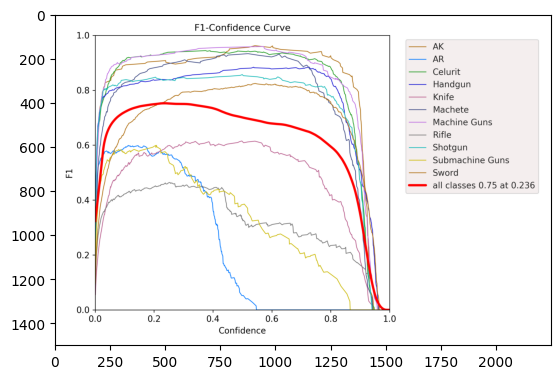

# Discussion

# Conclusion

# References
Akash, S. A. A., Moorthy, R. S. S., Esha, K., & Nathiya, N. (2022). Human Violence Detection Using Deep Learning Techniques. Journal of Physics: Conference Series, 2318(1), 012003. https://doi.org/10.1088/1742-6596/2318/1/012003

How to increase recall · Issue #2449 · ultralytics/yolov5. (n.d.). GitHub. Retrieved November 20, 2024, from https://github.com/ultralytics/yolov5/issues/2449

Jocher, G., Chaurasia, A., Stoken, A., Borovec, J., NanoCode012, Kwon, Y., Michael, K., TaoXie, Fang, J., imyhxy, Lorna, Yifu), 曾逸夫(Zeng, Wong, C., V, A., Montes, D., Wang, Z., Fati, C., Nadar, J., Laughing, … Jain, M. (2022). ultralytics/yolov5: V7.0 - YOLOv5 SOTA Realtime Instance Segmentation (Version v7.0) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.7347926

Mahasin, M., & Dewi, I. A. (2022). Comparison of CSPDarkNet53, CSPResNeXt-50, and EfficientNet-B0 Backbones on YOLO V4 as Object Detector. International Journal of Engineering, Science and Information Technology, 2(3), 64–72. https://doi.org/10.52088/ijesty.v2i3.291
Tang, S., Zhang, S., & Fang, Y. (2023). HIC-YOLOv5: Improved YOLOv5 For Small Object Detection (No. arXiv:2309.16393). arXiv. https://doi.org/10.48550/arXiv.2309.16393

Wang, C.-Y., Bochkovskiy, A., & Liao, H.-Y. M. (2021). Scaled-YOLOv4: Scaling Cross Stage Partial Network (No. arXiv:2011.08036). arXiv. http://arxiv.org/abs/2011.08036

YOLOv5 Object Detection Model: What is, How to Use. (n.d.). Retrieved October 27, 2024, from https://roboflow.com/model/yolov5
